## Function to apply several linear regression models

In [8]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
import math
import statsmodels.api as sm 
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from scipy.stats.mstats import zscore

# Function Explanation

#### This function contains five regression models:

The regression models are acessed via their keywords:
'RigidRegression', 'BayesianRegressor' 'DecisionTree', 'SVM, 'KNeighbors'

The regression models use their default values.
For KNeighbors the n number was chossen to be 30
For SVM the kernel was set to linear

This function creates an output text file (per default named 'linreg_output.txt'). If rerunning the functions make sure to rename the output txt file so that it doesnt get overwritten. The output file holds the coefficients of the variables if possible. The OLS ouput, the CrossValidation output. If you want so see which information are written into the outputfile look for file = f after print statements

This function creates various plots. 
Plot1 : actual y-values vs. predict y_value
Plot2 : Residual plot
Plot3 : Probability plot


!!!Caution: The function hasn't been thoroughly tested yet. It has been tested with all regression models and no error warnings were depicted. But still look with care at the output file and the plots.


The function takes following keywords:
X_train = Training set of the features
y_train = Training set of the target
X_test = Test set of the features
y_test = Test set of the target
feature = the complete Set of the features aka X variables
target = the complete set of the feature aka y variable
targetname = the name as string of the targetvariabel e.g 'qc_salzrckhalt'
regressormodel = the name of the choosen regressormodel e.g 'RigidRegression'

!!! Caution: The function suppresses the KeyError 0 for error calculation. 

In [9]:

def LinFunc(X_train,y_train,X_test,y_test,feature, target, targetname, regressormodel):
    
    f = open('linreg_output.txt', 'a')
    
    if regressormodel == 'RigidRegression':
    
        # Training and Cross Validation
        model=linear_model.Ridge()
        model.fit(X_train,y_train)
        y_predict=model.predict(X_train)
    
        error=0
        for i in range(len(y_train)):
            try:
                error+=(abs(y_train[i]-y_predict[i])/y_train[i])
            except KeyError:
                continue
        train_error_ridge=error/len(y_train)*100
        print("{} Train error = "'{}'.format(regressormodel,train_error_ridge)+" percent in Ridge Regression", file = f)
        print('{} intercept :'.format(regressormodel), model.intercept_, '\n', file = f)
        print(pd.DataFrame({'{}':X_train.columns, 'coeficients':model.coef_[0]}), file = f)
        print("{} Training set score: {:.2f}".format(regressormodel, model.score(X_train, y_train)))
    
    
        # Rigid Regression K-Fold Cross Validation
        cv_model = linear_model.Ridge()
        cv_scores = cross_val_score(cv_model, feature, target, cv = 10, scoring ='r2')
        print('{} Cross Validation scores: {}'.format(regressormodel, cv_scores), file = f)
        print("\n{} Average 10-Fold CV Score: {}".format(regressormodel,np.mean(cv_scores)), file = f)
    
    
        # Model testing
        y_pred=model.predict(X_test)
        y_Predict=list(y_test)

        error=0
        for i in range(len(y_test)):
            try:
                error+=(abs(y_Predict[i]-y_test[i])/y_Predict[i])
            except KeyError:
                continue
            test_error_ridge=error/len(y_test)*100
        print("{} Test error = "'{}'.format(regressormodel, test_error_ridge)+" percent ", file = f)
    
    
    if regressormodel == 'BayesianRegressor':
    
        # Training and Cross Validation
        model=linear_model.BayesianRidge()
        model.fit(X_train,y_train)
        y_predict=model.predict(X_train)
    
        error=0
        for i in range(len(y_train)):
            try:
                error+=(abs(y_train[i]-y_predict[i])/y_train[i])
            except KeyError:
                continue
        train_error_ridge=error/len(y_train)*100
        print("{} Train error = "'{}'.format(regressormodel,train_error_ridge)+" percent in Ridge Regression", file = f)
        print('{} intercept :'.format(regressormodel), model.intercept_, '\n', file = f)
        print(pd.DataFrame({'{}':X_train.columns, 'coeficients':model.coef_[0]}), file = f)
        print("{} Training set score: {:.2f}".format(regressormodel, model.score(X_train, y_train)))
    
    
        # K-Fold Cross Validation
        cv_model = linear_model.Ridge()
        cv_scores = cross_val_score(cv_model, feature, target, cv = 10, scoring ='r2')
        print('{} Cross Validation scores: {}'.format(regressormodel, cv_scores), file = f)
        print("\n{} Average 10-Fold CV Score: {}".format(regressormodel,np.mean(cv_scores)), file = f)
    
    
        # Model testing
        y_pred=model.predict(X_test)
        y_Predict=list(y_test)

        error=0
        for i in range(len(y_test)):
            try:
                error+=(abs(y_Predict[i]-y_test[i])/y_Predict[i])
            except KeyError:
                continue
            test_error_ridge=error/len(y_test)*100
        print("{} Test error = "'{}'.format(regressormodel, test_error_ridge)+" percent ", file = f)
    
    if regressormodel == 'DecisionTree':
    
        # Training and Cross Validation
        model=tree.DecisionTreeRegressor()
        model.fit(X_train,y_train)
        y_predict=model.predict(X_train)
    
        error=0
        for i in range(len(y_train)):
            try:
                error+=(abs(y_train[i]-y_predict[i])/y_train[i])
            except KeyError:
                continue
        train_error_ridge=error/len(y_train)*100
        print("{} Train error = "'{}'.format(regressormodel,train_error_ridge)+" percent in Ridge Regression", file = f)
        #print('{} intercept :'.format(regressormodel), model.intercept_, '\n', file = f) # 'DecisionTreeRegressor' object has no attribute 'intercept_'
        #print(pd.DataFrame({'{}':X_train.columns, 'coeficients':model.coef_[0]}), file = f) 'DecisionTreeRegressor' object has no attribute 'coef_'
        print("{} Training set score: {:.2f}".format(regressormodel, model.score(X_train, y_train)))
    
    
        # K-Fold Cross Validation
        cv_model = linear_model.Ridge()
        cv_scores = cross_val_score(cv_model, feature, target, cv = 10, scoring ='r2')
        print('{} Cross Validation scores: {}'.format(regressormodel, cv_scores), file = f)
        print("\n{} Average 10-Fold CV Score: {}".format(regressormodel,np.mean(cv_scores)), file = f)
    
    
        # Model testing
        y_pred=model.predict(X_test)
        y_Predict=list(y_test)

        error=0
        for i in range(len(y_test)):
            try:
                error+=(abs(y_Predict[i]-y_test[i])/y_Predict[i])
            except KeyError:
                continue
            test_error_ridge=error/len(y_test)*100
        print("{} Test error = "'{}'.format(regressormodel, test_error_ridge)+" percent ", file = f)
    
    
    if regressormodel == 'SVM':
    
        # Training and Cross Validation
        model=svm.SVR(kernel = 'linear')
        model.fit(X_train,y_train)
        y_predict=model.predict(X_train)
    
        error=0
        for i in range(len(y_train)):
            try:
                error+=(abs(y_train[i]-y_predict[i])/y_train[i])
            except KeyError:
                continue
        train_error_ridge=error/len(y_train)*100
        print("{} Train error = "'{}'.format(regressormodel,train_error_ridge)+" percent in Ridge Regression", file = f)
        print('{} intercept :'.format(regressormodel), model.intercept_, '\n', file = f) # 'DecisionTreeRegressor' object has no attribute 'intercept_'
        print(pd.DataFrame({'{}':X_train.columns, 'coeficients':model.coef_[0]}), file = f) #'DecisionTreeRegressor' object has no attribute 'coef_'
        print("{} Training set score: {:.2f}".format(regressormodel, model.score(X_train, y_train)))
    
    
        # K-Fold Cross Validation
        cv_model = linear_model.Ridge()
        cv_scores = cross_val_score(cv_model, feature, target, cv = 10, scoring ='r2')
        print('{} Cross Validation scores: {}'.format(regressormodel, cv_scores), file = f)
        print("\n{} Average 10-Fold CV Score: {}".format(regressormodel,np.mean(cv_scores)), file = f)
    
    
        # Model testing
        y_pred=model.predict(X_test)
        y_Predict=list(y_test)

        error=0
        for i in range(len(y_test)):
            try:
                error+=(abs(y_Predict[i]-y_test[i])/y_Predict[i])
            except KeyError:
                continue
            test_error_ridge=error/len(y_test)*100
        print("{} Test error = "'{}'.format(regressormodel, test_error_ridge)+" percent ", file = f)
    
    
    if regressormodel == 'KNeighbors':
    
    # Training and Cross Validation
        n_neighbors = 30
        model=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
        model.fit(X_train,y_train)
        y_predict=model.predict(X_train)
    
        error=0
        for i in range(len(y_train)):
            try:
                error+=(abs(y_train[i]-y_predict[i])/y_train[i])
            except KeyError:
                continue
        train_error_ridge=error/len(y_train)*100
        print("{} Train error = "'{}'.format(regressormodel,train_error_ridge)+" percent in Ridge Regression", file = f)
        #print('{} intercept :'.format(regressormodel), model.intercept_, '\n', file = f) KNeighborsRegressor' object has no attribute intercept
        #print(pd.DataFrame({'{}':X_train.columns, 'coeficients':model.coef_[0]}).format(regressormodel), file = f) KNN does not provide a prediction for the importance or coefficients of variables.
        print("{} Training set score: {:.2f}".format(regressormodel, model.score(X_train, y_train)), file = f)
    
              
    
        # KNeighborRegression K-Fold Cross Validation
        cv_model = linear_model.Ridge()
        cv_scores = cross_val_score(cv_model, feature, target, cv = 10, scoring ='r2')
        print('{} Cross Validation scores: {}'.format(regressormodel, cv_scores), file = f)
        print("\n{} Average 10-Fold CV Score: {}".format(regressormodel,np.mean(cv_scores)), file = f)
    
    
        # Model testing
        y_pred=model.predict(X_test)
        y_Predict=list(y_test)

        error=0
        for i in range(len(y_test)):
            try:
                error+=(abs(y_Predict[i]-y_test[i])/y_Predict[i])
            except KeyError:
                continue
            test_error_ridge=error/len(y_test)*100
        print("{} Test error = "'{}'.format(regressormodel, test_error_ridge)+" percent ", file = f)
    
    
    # plotting results
    y_pred_a = pd.DataFrame(y_pred)
    y_test_a = y_test.reset_index(drop=True, inplace = False)
    pred_act_df = pd.concat([y_test_a,y_pred_a], axis = 1).sort_values(1,axis = 1).reset_index(drop=True)
    
    plt.figure(figsize=(6, 6))
    maxlimit = pred_act_df[targetname].max()
    plt.xlim(0, maxlimit)
    plt.ylim(0, maxlimit)
    a = plt.scatter(pred_act_df[0], pred_act_df[targetname], s=10)
    plt.xlabel('Predicted {}'.format(targetname))
    plt.ylabel('Actual {}'.format(targetname))
    plt.plot([-1,maxlimit], [-1,maxlimit], ls="--", c=".3")
    plt.title('Actual vs Predicted {}'.format(targetname))
    figure = a.get_figure()
    figure.savefig('{}.pdf'.format(regressormodel), bbox_inches = 'tight')
    
    
    # Model evaluation
    # Adjusted R square
    
    #re-run OLS model as sm_model using training and testing dataset,
    X_train_sm = sm.add_constant(X_train)
    sm_train_model = sm.OLS(y_train, X_train_sm).fit()
    print('{} Training set adj r2: {}'.format(regressormodel, sm_train_model.rsquared_adj), file = f)

    #run CV again and loop through results applying adjusted r2 formula. Output the results
    cv_scores_r2 = cross_val_score(cv_model, feature, target,cv=10, scoring='r2')
    cv_scores_adj = []
    n = len(feature)
    k = len(feature.columns)
    for r in cv_scores_r2:
        adj_r2 = 1-(((1-r)*(n-1))/(n-k-1))
        cv_scores_adj.append(adj_r2)
    print('{} Average 10-Fold CV adj r2: {}'.format(regressormodel, np.mean(cv_scores_adj)), file = f)
    
    # standardized regression coefficients
    print("{}:\n {}".format(regressormodel, sm.OLS(zscore(y_pred), zscore(X_test)).fit().summary()), file = f)
    print(sm.OLS(zscore(y_train), zscore(X_train)).fit().summary(), file = f)
    
    # RSME 
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

    print("{} Root Mean Squared Error of Training Set: {}".format(regressormodel, rmse_train), file = f)
    print("{} Root Mean Squared Error of Testing Set: {}".format(regressormodel, rmse_test), file = f)
    
    # p_Value/ Variable Significance
    X_train_sm = sm.add_constant(X_train)
    sm_model = sm.OLS(y_train, X_train_sm).fit()
    print(sm_model.summary(), file = f)
    print(sm_model.rsquared_adj, file = f)
    
    
    # Residual plot
    y_pred = pd.DataFrame(y_pred)
    y_test = y_test.reset_index(drop=True)
    residuals = y_test - y_pred[0]

    #plotting Residual and Probabililty graph
    plt.figure(figsize=(18, 5))
    plt.subplot(1,2,1)
    plt.axhline(0, color="blue")
    plt.title('Plot of Residuals')
    b = plt.scatter(residuals.index,residuals, s=20)
    
    figure = b.get_figure()
    figure.savefig('{} Residualplot {}.pdf'.format(regressormodel, targetname), bbox_inches ='tight')
    
    
    plt.subplot(1,2,2)
    plt.title('Probability Plot')
    stats.probplot(residuals, dist='norm',plot=plt)
    fig = plt.figure()
    fig.savefig('{} Probability Plot {}.pdf'.format(regressormodel,targetname), bbox_inches = 'tight')
    
    f.close()

In [10]:
import pandas as pd
# import here your dataset
# be sure to filte out zero values

df = pd.read_pickle('data_process_df_norm4_added_p_product_column.pkl')
mask = df['qc_salzrckhalt']!=0
df = df[mask]


In [11]:
# Create feature aka X and y aka target
X = df.drop(['qc_a-value_l/m2/h/bar','qc_b-value_m/s_10-6','qc_salzrckhalt','p_product_full_name','p_product'],axis =1)
y = df['qc_salzrckhalt']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

RigidRegression Training set score: 0.01


/home/elron/anaconda3/envs/da/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/elron/anaconda3/envs/da/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


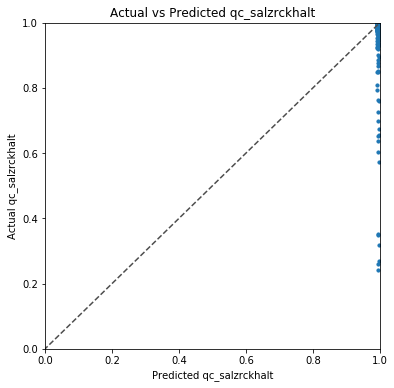

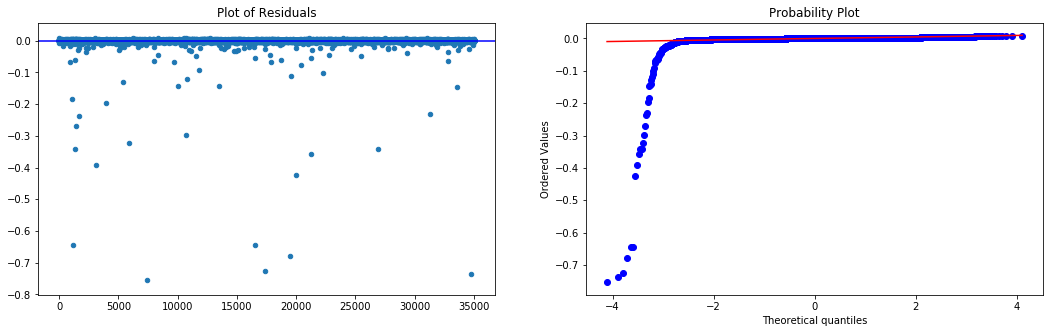

<Figure size 432x288 with 0 Axes>

In [13]:
LinFunc(X_train,y_train,X_test,y_test,X,y,'qc_salzrckhalt','RigidRegression')